# Exploring Hacker News Posts

Hacker News website is place where people ask questions and other people comment on it. Some people want to show their projects and some share general things. We are interested with posts starting with ASK HN meaning someone is asking question and Show HN meaning that someone is showing something. Our target is to check which kind of posts get more responses and in what time slot.

In [1]:
#import the important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
#import the dataset 
hn = pd.read_csv('news_posts.csv')

In [3]:
#print the dataset
hn.head()

,id,title,url,num_points,num_comments,author,created_at
0,12224879,Interactive Dynamic Video,http://www.interactivedynamicvideo.com/,386,52,ne0phyte,8/4/2016 11:52
1,10975351,How to Use Open Source and Shut the Fuck Up at...,http://hueniverse.com/2016/01/26/how-to-use-op...,39,10,josep2,1/26/2016 19:30
2,11964716,Florida DJs May Face Felony for April Fools' W...,http://www.thewire.com/entertainment/2013/04/f...,2,1,vezycash,6/23/2016 22:20
3,11919867,Technology ventures: From Idea to Enterprise,https://www.amazon.com/Technology-Ventures-Ent...,3,1,hswarna,6/17/2016 0:01
4,10301696,Note by Note: The Making of Steinway L1037 (2007),http://www.nytimes.com/2007/11/07/movies/07ste...,8,2,walterbell,9/30/2015 4:12


In [4]:
#print the info
hn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20100 entries, 0 to 20099
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            20100 non-null  int64 
 1   title         20100 non-null  object
 2   url           17660 non-null  object
 3   num_points    20100 non-null  int64 
 4   num_comments  20100 non-null  int64 
 5   author        20100 non-null  object
 6   created_at    20100 non-null  object
dtypes: int64(3), object(4)
memory usage: 1.1+ MB


In [5]:
#we dont need url column to check which post is more popular that's why delete the column
hn = hn.drop('url',axis=1)

In [6]:
hn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20100 entries, 0 to 20099
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            20100 non-null  int64 
 1   title         20100 non-null  object
 2   num_points    20100 non-null  int64 
 3   num_comments  20100 non-null  int64 
 4   author        20100 non-null  object
 5   created_at    20100 non-null  object
dtypes: int64(3), object(3)
memory usage: 942.3+ KB


In [7]:
#we cant analyze the created_at column in string data type. That's why we need to convert it into datetime datatype.
#hn = pd.read_csv('news_posts.csv',parse_dates = ['created_at'])
#Another way to convert it into datetime datatype
#hn['created_at '] = pd.to_datetime(hn['created_at'])
#third method
hn['created_at'] = hn['created_at'].astype('datetime64[ns]')
hn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20100 entries, 0 to 20099
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            20100 non-null  int64         
 1   title         20100 non-null  object        
 2   num_points    20100 non-null  int64         
 3   num_comments  20100 non-null  int64         
 4   author        20100 non-null  object        
 5   created_at    20100 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 942.3+ KB


In [8]:
# Now we need to divide the dataset into three categories; Ask HN, Show HN, and others
ask_bol = hn['title'].str.lower().str.startswith('ask hn')
show_bol = hn['title'].str.lower().str.startswith('show hn')

In [9]:
ask_posts = hn[ask_bol].copy()
show_posts = hn[show_bol].copy()

In [10]:
ask_posts.head()

,id,title,num_points,num_comments,author,created_at
7,12296411,Ask HN: How to improve my personal website?,2,6,ahmedbaracat,2016-08-16 09:55:00
17,10610020,Ask HN: Am I the only one outraged by Twitter ...,28,29,tkfx,2015-11-22 13:43:00
22,11610310,Ask HN: Aby recent changes to CSS that broke m...,1,1,polskibus,2016-05-02 10:14:00
30,12210105,Ask HN: Looking for Employee #3 How do I do it?,1,3,sph130,2016-08-02 14:20:00
31,10394168,Ask HN: Someone offered to buy my browser exte...,28,17,roykolak,2015-10-15 16:38:00


In [11]:
show_posts.head()

,id,title,num_points,num_comments,author,created_at
13,10627194,Show HN: Wio Link ESP8266 Based Web of Things...,26,22,kfihihc,2015-11-25 14:03:00
39,10646440,Show HN: Something pointless I made,747,102,dhotson,2015-11-29 22:46:00
46,11590768,"Show HN: Shanhu.io, a programming playground p...",1,1,h8liu,2016-04-28 18:05:00
84,12178806,Show HN: Webscope Easy way for web developers...,3,3,fastbrick,2016-07-28 07:11:00
97,10872799,Show HN: GeoScreenshot Easily test Geo-IP bas...,1,9,kpsychwave,2016-01-09 20:45:00


In [12]:
#those posts which are neither ask hn or show hn
other_posts = hn[~(ask_bol | show_bol)]
other_posts.head()

,id,title,num_points,num_comments,author,created_at
0,12224879,Interactive Dynamic Video,386,52,ne0phyte,2016-08-04 11:52:00
1,10975351,How to Use Open Source and Shut the Fuck Up at...,39,10,josep2,2016-01-26 19:30:00
2,11964716,Florida DJs May Face Felony for April Fools' W...,2,1,vezycash,2016-06-23 22:20:00
3,11919867,Technology ventures: From Idea to Enterprise,3,1,hswarna,2016-06-17 00:01:00
4,10301696,Note by Note: The Making of Steinway L1037 (2007),8,2,walterbell,2015-09-30 04:12:00


In [13]:
#to see which category gets more responses, let's take the mean of number of comments
ask_avg_comm = ask_posts['num_comments'].mean()
show_avg_comm = show_posts['num_comments'].mean()
print(ask_avg_comm,show_avg_comm)

14.038417431192661 10.31669535283993


The ask posts get more average number of comments as compared to show posts.

In [14]:
avg_comm = pd.Series({'ask_com' :ask_avg_comm ,'show_com' :show_avg_comm })
avg_comm

ask_com     14.038417
show_com    10.316695
dtype: float64

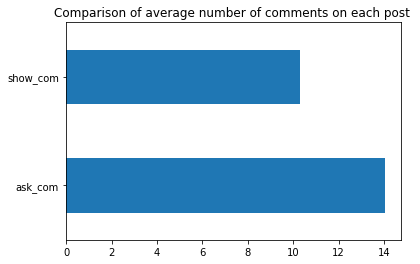

In [15]:
#visualize the data
avg_comm.plot.barh(title = 'Comparison of average number of comments on each post ')
plt.show()

Now we have established that ask hn post gets more response as compared to show hn. Our second target was to check that in which time slot, we will get more response. We have to extract data at each hour and check number of comments.

In [16]:
#create an extra column that shows at which hour the posts were created.
ask_posts["hours"] = ask_posts["created_at"].dt.hour
ask_posts.head()

,id,title,num_points,num_comments,author,created_at,hours
7,12296411,Ask HN: How to improve my personal website?,2,6,ahmedbaracat,2016-08-16 09:55:00,9
17,10610020,Ask HN: Am I the only one outraged by Twitter ...,28,29,tkfx,2015-11-22 13:43:00,13
22,11610310,Ask HN: Aby recent changes to CSS that broke m...,1,1,polskibus,2016-05-02 10:14:00,10
30,12210105,Ask HN: Looking for Employee #3 How do I do it?,1,3,sph130,2016-08-02 14:20:00,14
31,10394168,Ask HN: Someone offered to buy my browser exte...,28,17,roykolak,2015-10-15 16:38:00,16


In [17]:
ask_posts.groupby("hours")["num_comments"].mean().sort_values(ascending=False)

hours
15    38.594828
2     23.810345
20    21.525000
16    16.796296
21    16.009174
13    14.741176
10    13.440678
14    13.233645
18    13.201835
17    11.460000
1     11.383333
11    11.051724
19    10.800000
8     10.250000
5     10.086957
12     9.410959
6      9.022727
0      8.127273
23     7.985294
7      7.852941
3      7.796296
4      7.170213
22     6.746479
9      5.577778
Name: num_comments, dtype: float64

Our Analysis shows that if you post anything on Hacker News website with Ask HN tag and around 3 pm US time, you will get maximum number of response. That's the end of our analysis. Thanks